In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

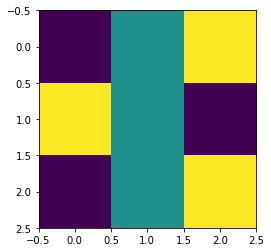

In [2]:
testImage = np.array([[1, 2, 3], [3, 2, 1], [1, 2, 3]])
plt.imshow(testImage)

In [18]:
r = 1

rotationMatrix = np.array([[np.cos(r), -np.sin(r)],
                           [-np.sin(r), np.cos(r)]])

print(rotationMatrix)
positionMatrix = np.array([[(j, i) for i in range(np.shape(testImage)[1])] for j in range(np.shape(testImage)[0])])
print(positionMatrix)

[[ 0.54030231 -0.84147098]
 [-0.84147098  0.54030231]]
[[[0 0]
  [0 1]
  [0 2]]

 [[1 0]
  [1 1]
  [1 2]]

 [[2 0]
  [2 1]
  [2 2]]]


In [23]:
print(np.array(positionMatrix @ rotationMatrix))

[[[ 0.          0.        ]
  [-0.84147098  0.54030231]
  [-1.68294197  1.08060461]]

 [[ 0.54030231 -0.84147098]
  [-0.30116868 -0.30116868]
  [-1.14263966  0.23913363]]

 [[ 1.08060461 -1.68294197]
  [ 0.23913363 -1.14263966]
  [-0.60233736 -0.60233736]]]


(460, 871, 3)


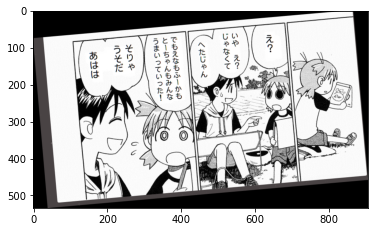

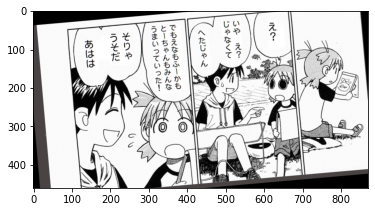

(460, 871, 3)
(460, 871, 3)


In [2]:
image = cv2.imread('yotsuba.png')
angle = 5. * np.pi/180. # In radians
translation = [0, 0]

print(image.shape)

# The center is also the width/2 or height/2
imageCenter = tuple(np.array(image.shape[1::-1]) / 2)

# Angle is in degrees here
rotationMat = cv2.getRotationMatrix2D(imageCenter, angle*180/np.pi, 1.0)

# Account for rotation increasing size of the image
rotationCos = np.abs(rotationMat[0][0])
rotationSin = np.abs(rotationMat[0][1])

newImageHeight = int((2*imageCenter[1] * rotationSin) +
                     (2*imageCenter[0] * rotationCos))
newImageWidth = int((2*imageCenter[1] * rotationCos) +
                    (2*imageCenter[0] * rotationSin))

# Make sure the rotated image is centered in the new frame
rotationMat[0][2] += (newImageHeight/2) - imageCenter[0]
rotationMat[1][2] += (newImageWidth/2) - imageCenter[1]
newSize = (newImageHeight, newImageWidth)

# Apply rotation
result = cv2.warpAffine(image, rotationMat, newSize)

plt.imshow(result)
plt.show()

# Translation matrix (adjusting for the new center of the frame)
translationMat = np.float32([[1, 0, translation[0] - (newImageHeight/2 - imageCenter[0])],
                            [0, 1, translation[1] - (newImageWidth/2 - imageCenter[1])]])

# Apply translation
# We crop back to the original size here, so we don't increase the image size
result = cv2.warpAffine(result, translationMat, image.shape[1::-1])
plt.imshow(result)
plt.show()

print(np.shape(image))
print(np.shape(result))

In [218]:
cv2.imshow('image', result)
cv2.waitKey()
cv2.destroyAllWindows()